# R&Python 交互

## 导入rpy2

In [13]:
import rpy2.robjects as robjects
pi = robjects.r('pi')
pi[0]

3.141592653589793

In [2]:
import rpy2.ipython

In [1]:
%load_ext rpy2.ipython

In [ ]:
%reload_ext rpy2.ipython 

## 将一行设为R代码

In [16]:
%R print("Hi from R")

[1] "Hi from R"


array(['Hi from R'], dtype='<U9')

## 将整个cell设为R代码

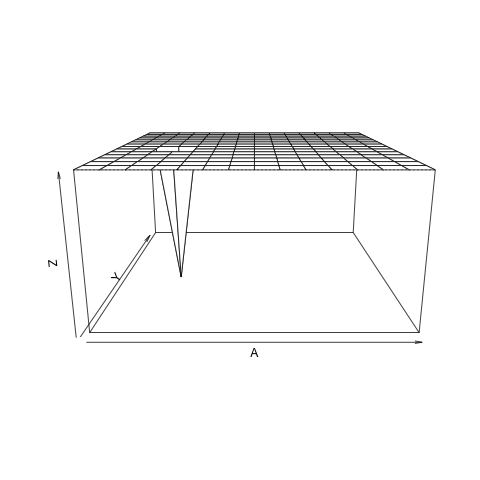

In [18]:
%%R
A <- matrix(1, 15, 15)
A[4,7] <- 0
persp(A, expand=0.5)

## python R 交互

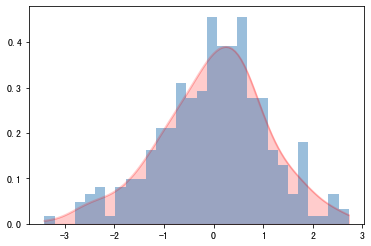

In [64]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
%matplotlib inline
x = np.random.randn(300)
density = stats.kde.gaussian_kde(x)
plt.hist(x, 30, density=1, alpha=0.5, facecolor='#377EB8')
xd = np.linspace(min(x), max(x), 100)
plt.plot(xd, density(xd), lw=2, alpha=0.2,color='r') #line
plt.fill_between(xd, 0, density(xd), alpha=0.2, color='r')
plt.show()

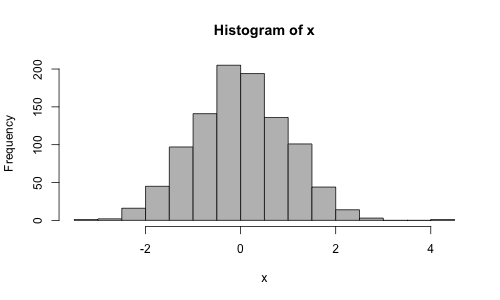

In [58]:
%%R -w 500 -h 300 
# 画图
x = rnorm(1000)
hist(x,c='gray')

### 从R获取变量var：

In [32]:
%%R -o x,y
x = rnorm(100)
y = rnorm(100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

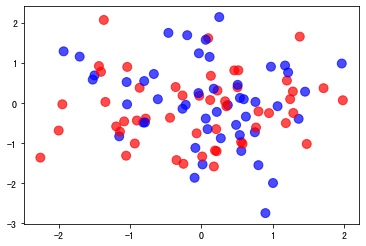

In [33]:
x = np.array(x)
y = np.array(y)
z = np.random.choice(['r','b'], size=100, replace=True)
plt.show(plt.scatter(x,y,s=80,c=z ,alpha=0.7))

### 从Python获取变量var: 

In [56]:
import numpy as np  
x=np.random.randint(1,10,30)        # 产生 1 到 10 的一个整数型随机数  
print(x)

[5 1 5 2 5 3 8 7 4 8 1 7 9 4 3 5 9 9 7 2 9 6 5 7 8 7 7 9 7 2]


In [47]:
%R -i x 
%R x <- list(x)
%R cat(summary(x) )

30 -none- numeric

In [53]:
%%R -i x 
cat(summary(x) )

1 3 4.5 5 7.75 9

In [ ]:
%%R
df = read.csv('iris.csv')
m = lm(Sepal_Length~Sepal_Width, data = df)
res = summary(m)
res$coefficients

## 一个整合R和python的例子

python抓取网页，结合R的可视化

In [1]:
import requests
from bs4 import BeautifulSoup
import re
url = "http://movie.douban.com/top250"
r = requests.get(url)
soup_packtpage = BeautifulSoup(r.text)

def namefunc(movie):
    names = [x.findChild('span',attrs={'class':'title'}).string for x in movie]
    return names
def scorefunc(movie):
    scores = [float(str(x.findChild('em').string)) for x in movie]
    return scores
def numfunc(movie):
    num = [x.findChild('span',attrs=None).string for x in movie]
    num = [int(str(re.sub('\D', '', x))) for x in num]
    return num
url = "http://movie.douban.com/top250"
def getinfo(url):
    r = requests.get(url)
    soup_packtpage = BeautifulSoup(r.text)
    movie = soup_packtpage.findAll('div',attrs={'class':'info'})
    names = namefunc(movie)
    scores = scorefunc(movie)
    num = numfunc(movie)
    res = {'names': names, 'scores': scores, 'num': num}
    return res

In [2]:
urls = []
index = range(0,250,25)
for x in index:
    urls.append('http://movie.douban.com/top250?start='+str(x)+'&filter=&type=')
urls

['http://movie.douban.com/top250?start=0&filter=&type=',
 'http://movie.douban.com/top250?start=25&filter=&type=',
 'http://movie.douban.com/top250?start=50&filter=&type=',
 'http://movie.douban.com/top250?start=75&filter=&type=',
 'http://movie.douban.com/top250?start=100&filter=&type=',
 'http://movie.douban.com/top250?start=125&filter=&type=',
 'http://movie.douban.com/top250?start=150&filter=&type=',
 'http://movie.douban.com/top250?start=175&filter=&type=',
 'http://movie.douban.com/top250?start=200&filter=&type=',
 'http://movie.douban.com/top250?start=225&filter=&type=']

In [3]:
res = {'names': [], 'scores': [], 'num': []}
for url in urls:
    new = getinfo(url)
    res['names'].extend(new['names'])
    res['scores'].extend(new['scores'])
    res['num'].extend(new['num'])

In [4]:
new

{'names': [], 'scores': [], 'num': []}

In [6]:
res 

{'names': [], 'scores': [], 'num': []}

In [7]:
import pandas as pd
df = pd.DataFrame(res)
df

,names,scores,num


In [8]:
%%R -i df -w 500 -h 300 
library(ggplot2)
p = ggplot(df,aes(x = num, y = scores)) + geom_point(size=4,alpha=0.5) + stat_smooth()
print(p)

UsageError: Cell magic `%%R` not found.
